# Import Libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Paths
yes_path = '/kaggle/input/brain-tumor-dataset/Brain MRI/no'  
no_path = '/kaggle/input/brain-tumor-dataset/Brain MRI/yes'   

data = []
labels = []

# Load images from the "Yes" folder
for img in os.listdir(yes_path):
    img_array = cv2.imread(os.path.join(yes_path, img), cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img_array, (128, 128))  # Resize to (128, 128)
    data.append(img_resized)
    labels.append(1)  # Label for "Yes" is 1

# Load images from the "No" folder
for img in os.listdir(no_path):
    img_array = cv2.imread(os.path.join(no_path, img), cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img_array, (128, 128))
    data.append(img_resized)
    labels.append(0)  # Label for "No" is 0

# Convert to NumPy arrays
data = np.array(data).reshape(-1, 128, 128, 1) / 255.0  # Normalize pixel values
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.5081 - loss: 0.6688 - val_accuracy: 0.5000 - val_loss: 1.6835
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.5660 - loss: 1.1881 - val_accuracy: 0.5000 - val_loss: 0.9548
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.5660 - loss: 0.7444 - val_accuracy: 0.5000 - val_loss: 0.7030
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6238 - loss: 0.6144 - val_accuracy: 0.6000 - val_loss: 0.6447
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.7106 - loss: 0.5710 - val_accuracy: 0.7000 - val_loss: 0.6348
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7894 - loss: 0.5189 - val_accuracy: 0.8000 - val_loss: 0.6463
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7396 - loss: 0.4842 - val_accuracy: 0.8000 - val_loss: 0.6113
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.7894 - loss: 0.4343 - val_accuracy: 0.7000 - val_loss:

In [3]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6667 - loss: 0.7085
Test Accuracy: 0.67


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


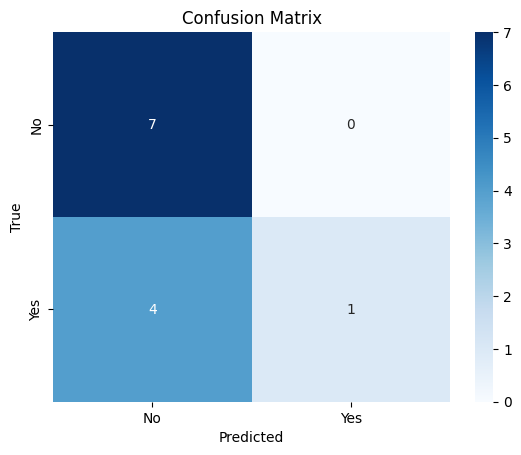

              precision    recall  f1-score   support

          No       0.64      1.00      0.78         7
         Yes       1.00      0.20      0.33         5

    accuracy                           0.67        12
   macro avg       0.82      0.60      0.56        12
weighted avg       0.79      0.67      0.59        12



In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)


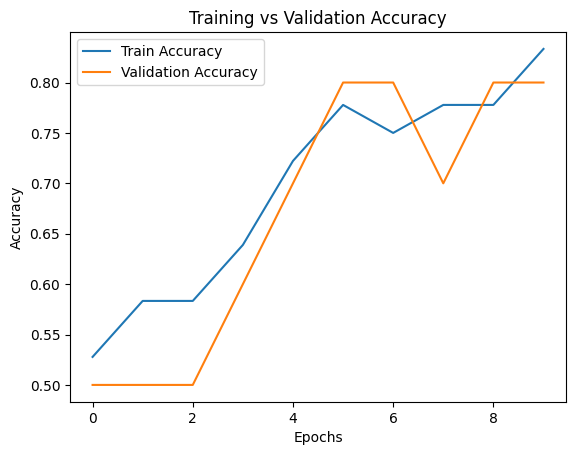

In [6]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
